In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Note To Self:
- Attempt 2
  - EDA is very Vague
  - Attempt 1 in performing EDA was  Futile
  - Be Logical
  - Help To transalte Buisness Insights
  - **Anything is exploratory, Nothing is Stupid**
  - Data Analytics is not rigid

In [2]:
df=pd.read_csv('nyc_taxi_trip_duration.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


### Exploratory Data Analysis
- Data Extraction
- Data Exploration and Transformation
  - Variable identification
  - Univariate
  - Bivariate
  - Missing Value Treatment
  - Outlier Transformation
  - Transformation

###  Converting to date time and data extraction

In [4]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])


In [5]:
df['pickup_year']=df['pickup_datetime'].dt.year
df['pickup_month']=df['pickup_datetime'].dt.month
df['pickup_day']=df['pickup_datetime'].dt.day
df['pickup_day_week']=df['pickup_datetime'].dt.dayofweek
df['pickup_hour']=df['pickup_datetime'].dt.hour
df['pickup_minutes']=df['pickup_datetime'].dt.minute
df['pickup_seconds']=df['pickup_datetime'].dt.second
df['drop_year']=df['dropoff_datetime'].dt.year
df['drop_month']=df['dropoff_datetime'].dt.month
df['drop_day']=df['dropoff_datetime'].dt.day
df['drop_day_week']=df['dropoff_datetime'].dt.dayofweek
df['drop_hour']=df['dropoff_datetime'].dt.hour
df['drop_minutes']=df['dropoff_datetime'].dt.minute
df['drop_seconds']=df['dropoff_datetime'].dt.second

df=df.drop(columns=['pickup_datetime','dropoff_datetime'],axis=1)
df.head()


,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_year,...,pickup_hour,pickup_minutes,pickup_seconds,drop_year,drop_month,drop_day,drop_day_week,drop_hour,drop_minutes,drop_seconds
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,2016,...,16,40,21,2016,2,29,0,16,47,1
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,2016,...,23,35,37,2016,3,11,4,23,53,57
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,2016,...,17,59,33,2016,2,21,6,18,26,48
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,2016,...,9,44,31,2016,1,5,1,10,3,32
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2016,...,6,42,23,2016,2,17,2,6,56,31


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   passenger_count     729322 non-null  int64  
 3   pickup_longitude    729322 non-null  float64
 4   pickup_latitude     729322 non-null  float64
 5   dropoff_longitude   729322 non-null  float64
 6   dropoff_latitude    729322 non-null  float64
 7   store_and_fwd_flag  729322 non-null  object 
 8   trip_duration       729322 non-null  int64  
 9   pickup_year         729322 non-null  int32  
 10  pickup_month        729322 non-null  int32  
 11  pickup_day          729322 non-null  int32  
 12  pickup_day_week     729322 non-null  int32  
 13  pickup_hour         729322 non-null  int32  
 14  pickup_minutes      729322 non-null  int32  
 15  pickup_seconds      729322 non-nul

##### One of the important things to add is the distance

In [7]:
def haversine_np(lon1, lat1, lon2, lat2, earth_radius=6371.0):
    """
    Calculates the great circle distance between two points using NumPy arrays.
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))

    distance = earth_radius * c
    return round(distance,2)

# Assuming your DataFrame is named 'df'
df['distance_km'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'],
                                            df['dropoff_longitude'], df['dropoff_latitude'])

In [8]:
df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_year,...,pickup_minutes,pickup_seconds,drop_year,drop_month,drop_day,drop_day_week,drop_hour,drop_minutes,drop_seconds,distance_km
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,2016,...,40,21,2016,2,29,0,16,47,1,1.20
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,2016,...,35,37,2016,3,11,4,23,53,57,4.13
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,2016,...,59,33,2016,2,21,6,18,26,48,7.25
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,2016,...,44,31,2016,1,5,1,10,3,32,2.36
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2016,...,42,23,2016,2,17,2,6,56,31,4.33


#### Think Logically:
- Even if we plot  a correlation involving pickup_longitude and such it will be just **pure coincidence**.
-  There will be outliers( when we plot , but they are useless) for longitude and latitude , that is because, it considers the points in flat shaped surface whereas the earth is spherical , therefore , I have come to the **conclusion  and also from experimentation in my first EDA attempt** for this data set that , the longitude and latitude values do not play a role in **correlation** .

#### Categorical Variables
- 'vendor_id','passenger_count','store_and_fwd_flag','pickup_day_week','pickup_month','pickup_day','Time_segment_incoming','Time_segment_outgoing'
#### Numerical Variables
-'trip_duration','pickup_hour','pickup_minutes','pickup_seconds','drop_hour','drop_minutes','drop_seconds,'distance_km'

- pickup_day== drop_day so we only take one variable

In [9]:
def rush_category(hour):
    if 6 <= hour <= 9:
        return 'Morning Rush'
    elif 17 <= hour <= 20:
        return 'Evening Rush'
    elif 10 <= hour <= 16:
        return 'Mid-Day'
    elif 21 <= hour <= 24 or 0 <= hour <= 5:
        return 'Off-Peak'  # Or 'Late Night'/'Early Morning'

df['Time_segment_incoming']=df['pickup_hour'].apply(rush_category)
df['Time_segment_outgoing']=df['drop_hour'].apply(rush_category)

In [10]:
df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_year,...,drop_year,drop_month,drop_day,drop_day_week,drop_hour,drop_minutes,drop_seconds,distance_km,Time_segment_incoming,Time_segment_outgoing
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,2016,...,2016,2,29,0,16,47,1,1.20,Mid-Day,Mid-Day
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,2016,...,2016,3,11,4,23,53,57,4.13,Off-Peak,Off-Peak
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,2016,...,2016,2,21,6,18,26,48,7.25,Evening Rush,Evening Rush
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,2016,...,2016,1,5,1,10,3,32,2.36,Morning Rush,Mid-Day
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2016,...,2016,2,17,2,6,56,31,4.33,Morning Rush,Morning Rush


In [11]:
categ_1= ['vendor_id','passenger_count','store_and_fwd_flag']
categ_2=['pickup_day_week','pickup_month']# We wont consider pickup_day as it is a vague dependent variable
categ_3=['Time_segment_incoming','Time_segment_outgoing']
Num_whole=['trip_duration','pickup_hour','pickup_minutes','pickup_seconds','drop_hour','drop_minutes','drop_seconds','distance_km' ]
num_1=['trip_duration','pickup_hour','pickup_minutes']
num_2=['pickup_seconds','drop_hour','drop_minutes']
num_3=['drop_seconds','distance_km']

### Univariate Numerical Analysis

In [12]:
def Univariate_num(data,var_group):
    size=len(var_group)
    plt.figure(figsize=(10,10),dpi=140)
    for j,i in enumerate(var_group):
        maxi=round(data[i].max(),2)
        mini=round(data[i].min(),2)
        rnge=maxi-mini
        meani=round(data[i].mean(),2)
        median=round(data[i].median(),2)
        skew=round(data[i].skew(),2)
        kurt=round(data[i].kurtosis(),2)
        std_dev=round(data[i].std())
        points=(meani-std_dev,meani+std_dev)
        plt.subplot(size,1,j+1)
        sns.kdeplot(data=data[i],fill=True)
        sns.lineplot(x=[mini,maxi],y=[0,0],color='red',label='Range')
        plt.scatter(x=[median],y=[0],color='blue',label='Median')
        plt.scatter(x=[meani],y=[0],color='yellow',label='Mean')
        plt.ylabel('Density')
        plt.xlabel('{}'.format(i),fontsize=10)
        plt.title(' std_dev={} skew ={} kurtosis={} mean={}; \n max={} min={},points={}'.
                  format(std_dev,skew,kurt,meani,maxi,mini,(points[0],points[1])),fontsize=10)
        plt.subplots_adjust(hspace=1.0)

#### Variable Identification:
- Univariate Numerical Analysis
  - **Trip duration** : This variable  can be considered because there will be definite outliers based on time of trip hpur
  - **pickup_hour ,drop_hour** : These variables can  be considered outlier will be there , however minutes and seconds can never be considered as they are very small values with respect to hours and seconds.
  - **distance_km** : these variables can be considered as there will definitely be outlier s and they are definitely significant
- **Conclusion**: Despite numerical type variables available:=**'trip_duration','pickup_hour','pickup_minutes','pickup_seconds','drop_hour','drop_minutes','drop_seconds','distance_km'**  We will only be selecting these 4 :**'trip_duration','pickup_hour','drop_hour','distance_km'** as they  by law of logic will make the most difference

In [13]:
essential_num=['trip_duration','pickup_hour','drop_hour','distance_km']

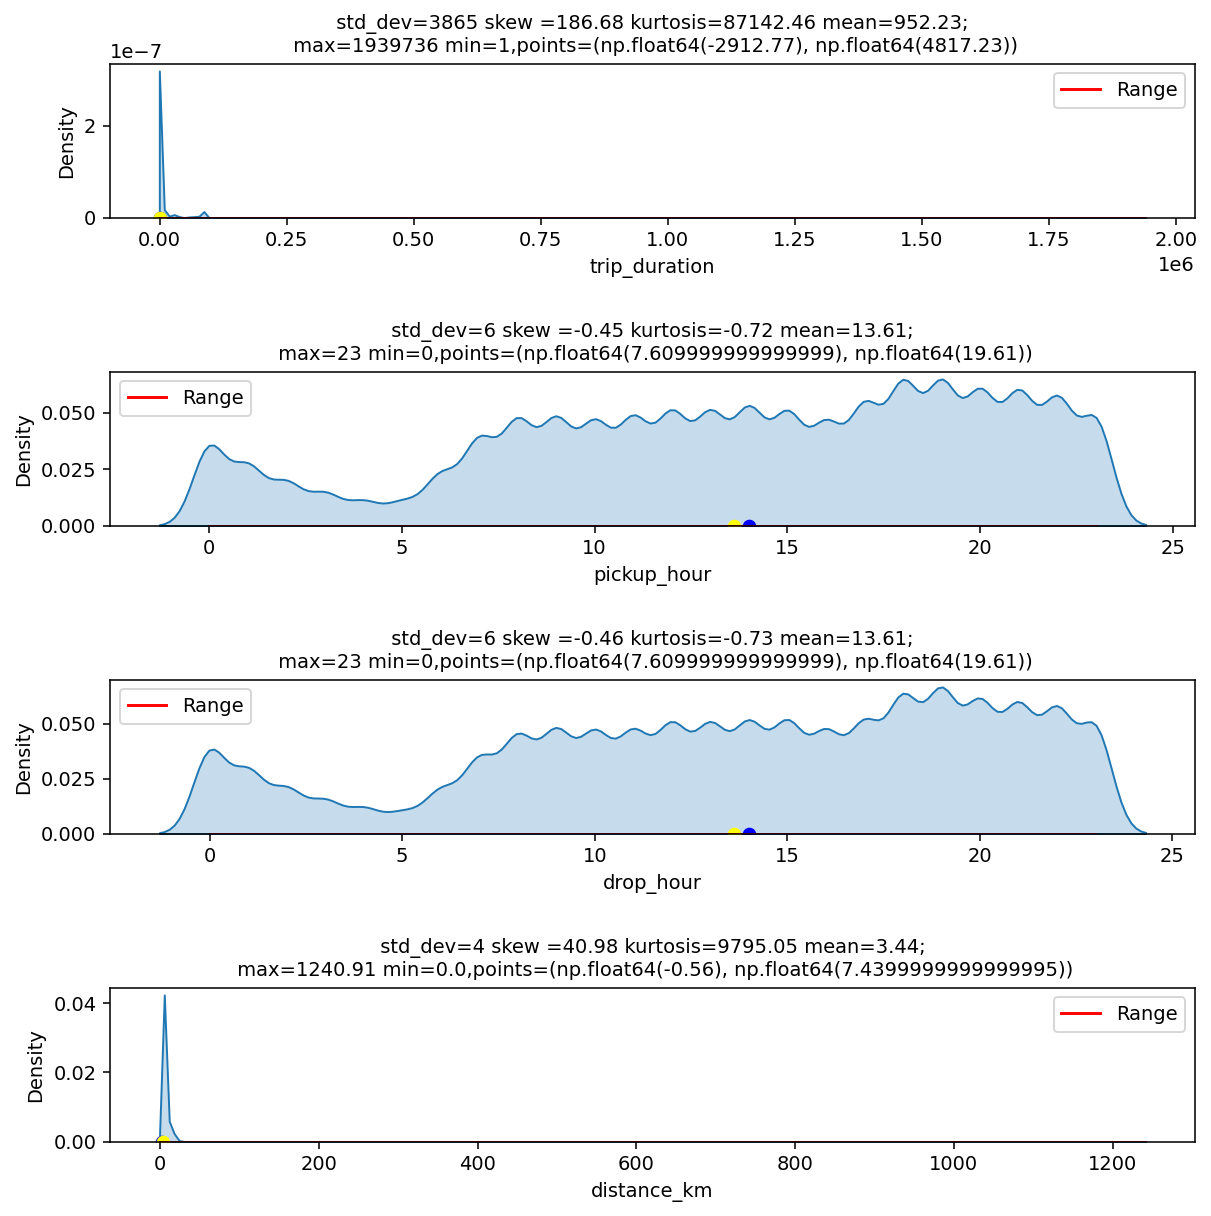

In [14]:
Univariate_num(df,essential_num)

#### Conclusion:
- **pickup_hour,drop_hour** : Are very similar differ by very small points , negligible kurtosis and skew.
- **trip_duration** : positively skewed and High positive kurtosis Indicating presence of outliers
- **distance_km** : positively skewed and High positive kurtosis Indicating presence of outliers
##### Insight:
- These trips are short trips such that pick up and drop trips fall under the same category of hour.
- Even though there might be outliers with respect to distance, the pickup/drop hour are same. Perhaps it may indicate low traffic routes are followed by these cab drivers

#### There might be trips with zero distances we need to remove them

In [15]:
df['distance_km'].value_counts()

,count
distance_km,
0.00,3927
1.22,2637
1.17,2619
1.18,2619
1.11,2605
...,...
28.90,1
29.57,1
27.62,1


#### Conclusion:
- There are zero values  distance of  count 2901

- What can be attributed for these Zero Values of distance:
  -  Trip duration starts when it is booked online and  then cancelled(max chances)
  - GPS Glitches(minimal  occurence)
  - Poor networks
  - Software glitch  for round trips (where it tracks displacement rather than distance) - very minimal chance
  - Or no shows which caused the cab driver to end the trip
 - We remove these zero values

In [16]:
df=df[df['distance_km']!=0].copy()

In [17]:
df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_year,...,drop_year,drop_month,drop_day,drop_day_week,drop_hour,drop_minutes,drop_seconds,distance_km,Time_segment_incoming,Time_segment_outgoing
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,2016,...,2016,2,29,0,16,47,1,1.20,Mid-Day,Mid-Day
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,2016,...,2016,3,11,4,23,53,57,4.13,Off-Peak,Off-Peak
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,2016,...,2016,2,21,6,18,26,48,7.25,Evening Rush,Evening Rush
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,2016,...,2016,1,5,1,10,3,32,2.36,Morning Rush,Mid-Day
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2016,...,2016,2,17,2,6,56,31,4.33,Morning Rush,Morning Rush


#### Looking for a much  deeper picture, we take log transformation

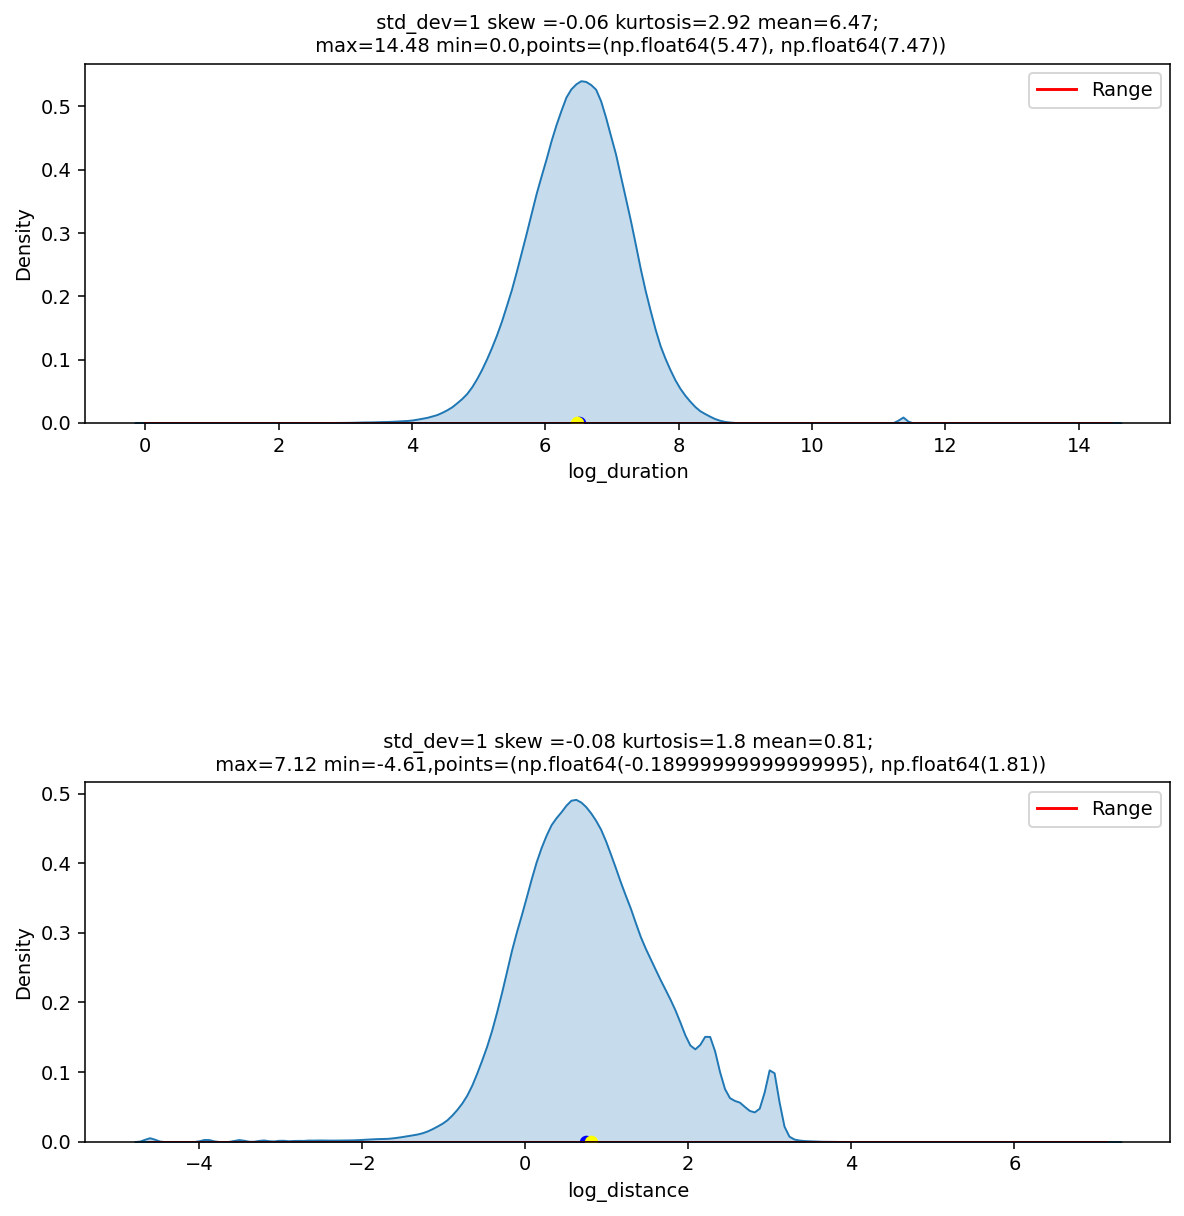

In [18]:
import math
df2=df.copy()
df2['log_duration']=df2['trip_duration'].apply(lambda x: math.log(x))
df2['log_distance']=df2['distance_km'].apply(lambda x: math.log(x))
essential_num1=['log_duration','log_distance']
Univariate_num(df2,essential_num1)

### Univariate Categorical Analysis

In [19]:
def Univariate_cat(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (10,10), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = round(data[i].value_counts(normalize = True).sort_values(ascending=True),2)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(size,1,j+1)
    sns.barplot(x=norm_count,y= norm_count.index ,orient='h')
    plt.xlabel('fraction/percent', fontsize = 10)
    plt.ylabel('{}'.format(i), fontsize = 10)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count),fontsize=10)
    plt.subplots_adjust(hspace=1.0)

In [20]:
df['passenger_count'].value_counts()

,count
passenger_count,
1,514531
2,104588
5,38767
3,29567
6,23959
4,13967
0,16


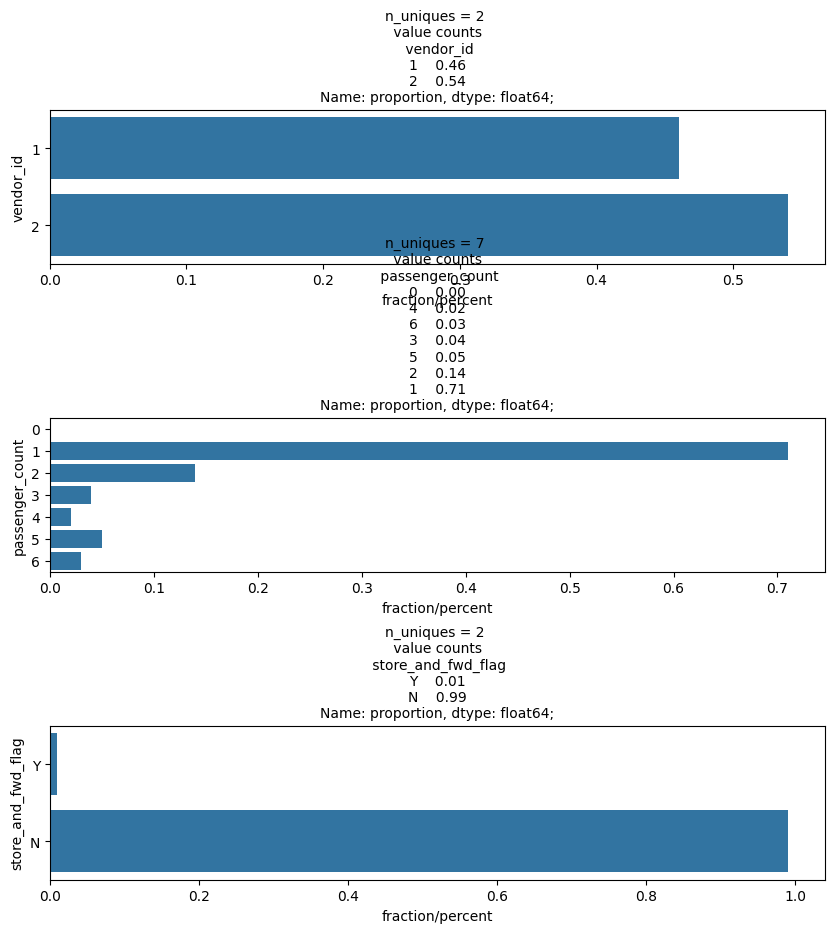

In [21]:
Univariate_cat(df,categ_1)

#### Conclusions
- There are cabs  with zero passengers
- they might be , if the rider wants  to be picked from a specific spot(plausible chances of occurence)
- Car used for personal use the by the cab driver(plausible chances of occurence) (pl
- glitches in software(minimum chance of occurig)

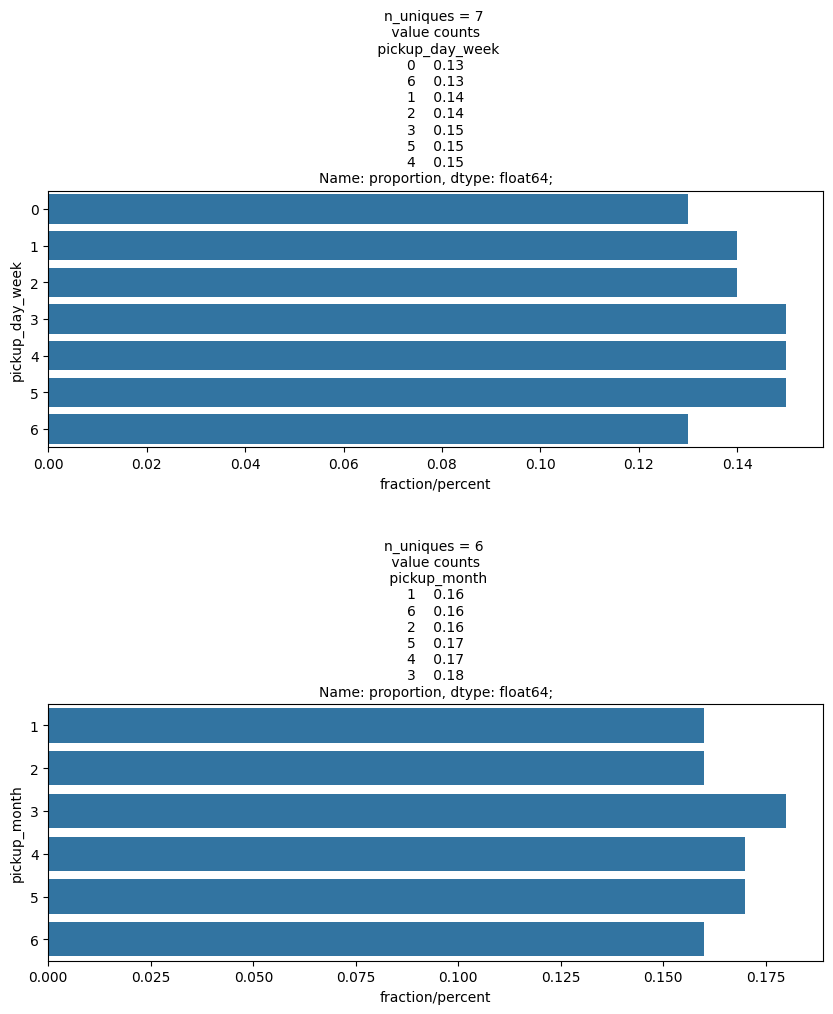

In [22]:
Univariate_cat(df,categ_2)

#### Insights:
- Wednesday , Thursday, Friday are peak days for the  cab bookings
- March April May are the  better months of cab booking, perhaps due to summer breaks or tourism season

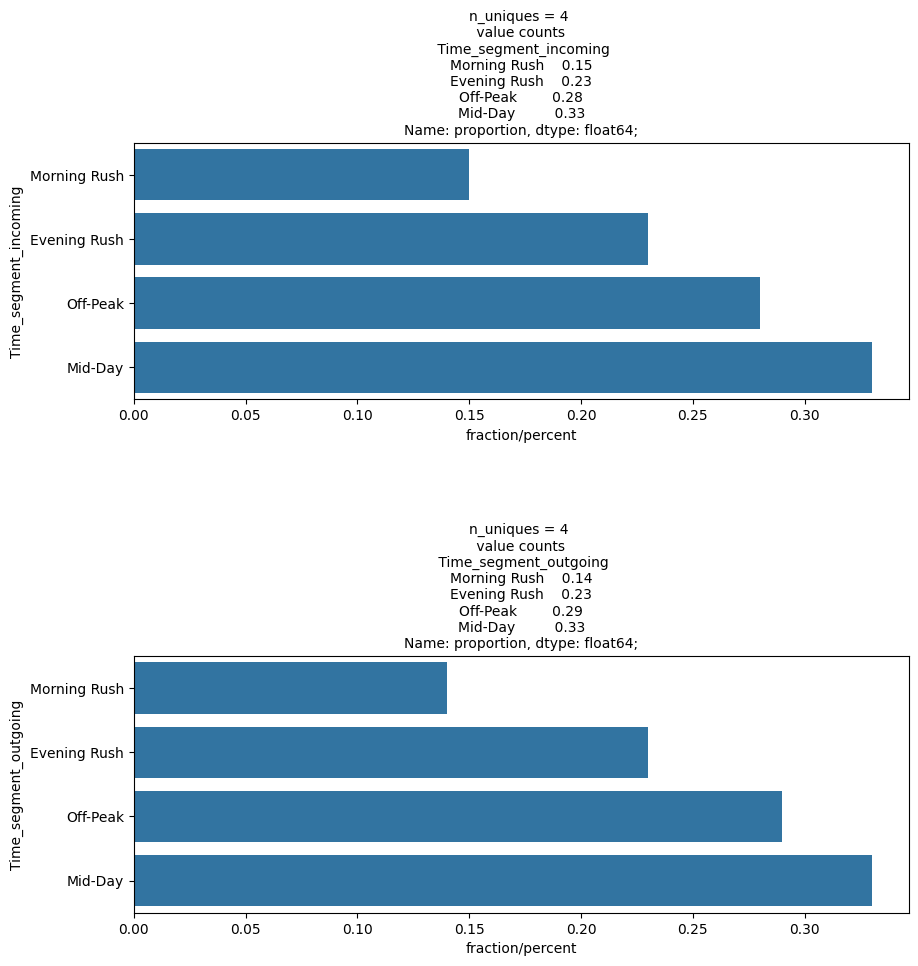

In [23]:
Univariate_cat(df,categ_3)

#### Insights/ COnclusion:
-Time_segments_incoming and Outgoing_ are more  or less similiar indicates  collinearity: which will be further proven using VIF Function
- Mid Day and Off Peak  are the peak hours: Indicating office travel and a  busy nights  but as they are off peak hours it indicates that the city is  busy at night

#### Bivariate Analysis:

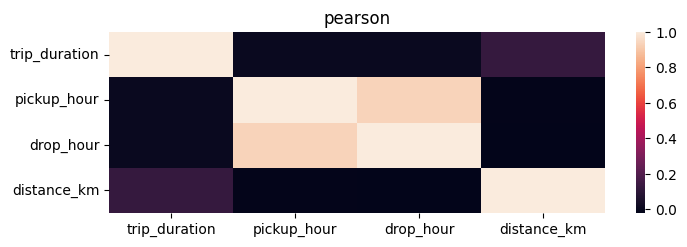

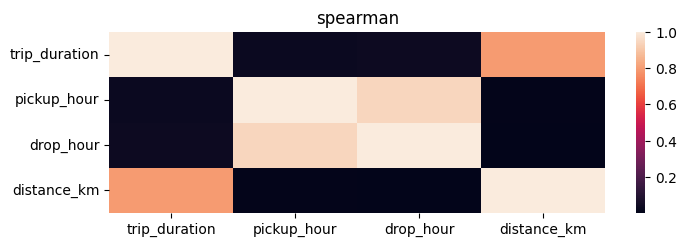

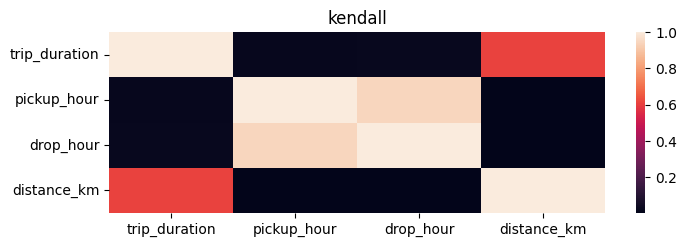

In [24]:
methods=['pearson','spearman','kendall']
l=len(methods)
for i in range(l):
    plt.figure(figsize=(8,8))
    plt.subplot(l,1,i+1)
    correlation_matrix=df[essential_num].corr(method=methods[i])
    sns.heatmap(correlation_matrix)
    plt.title(methods[i])


#### Conclusions/Insights:
- There are two  samples :
  - Kendalss tau
  - Spearmans
- Both can be used for outliers : But we prefer Kendalls for its more robustness in small samples
- pickup_hour and drop_hour show high correlation with each other
-  distane_km and trip_duration show  a medium  range of coorelation

#### Pair Plots:


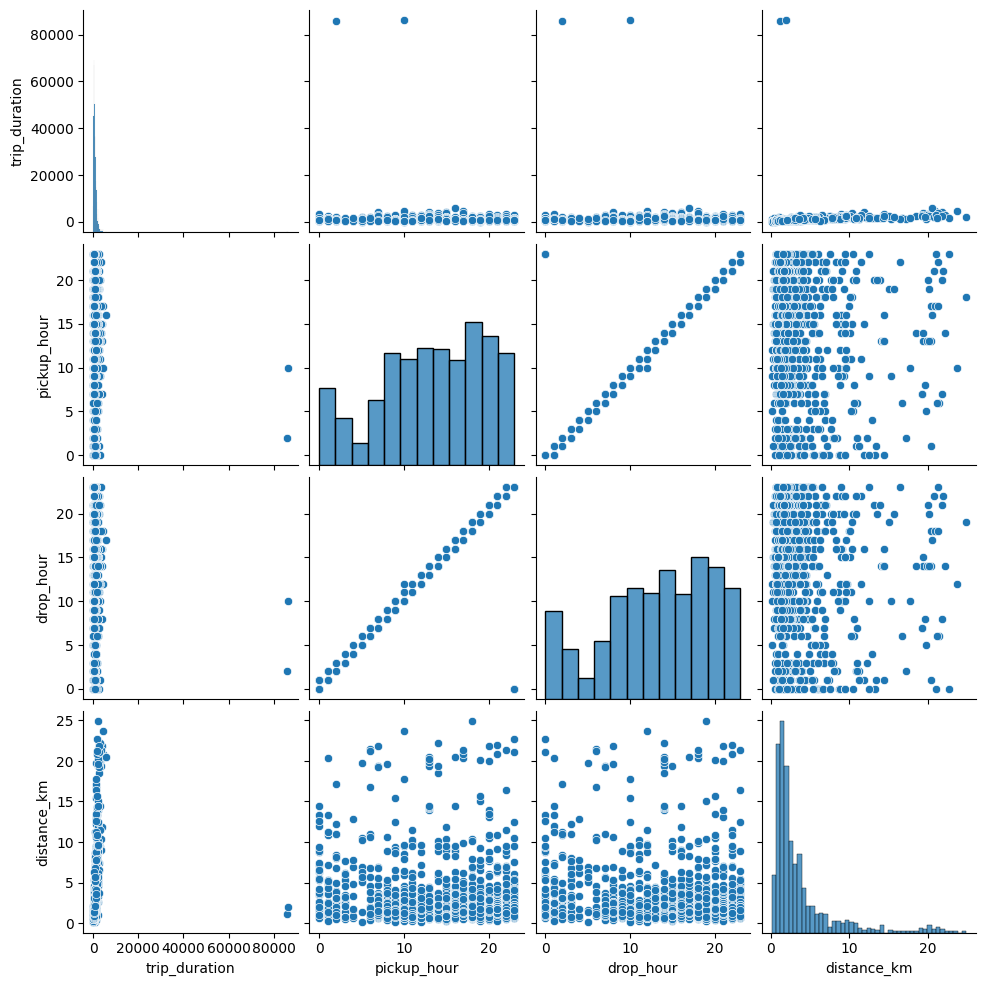

In [25]:
sns.pairplot(df[essential_num].sample(1000))

#### Conclusions/Insights:
- pickup and drop hour are nearly similar
- **distance_km vs trip_duration**: majority of the trips are below the 25 km mark  with an exception of one point( definitely an outlier) and majority of the trips definitely take  much less than 5.5hr apart from  very few which may be either due to traffic jams  or driver error in ending the trips and software error in uploading the data or software glitches( This is because trips less  than 5 km have breached 22 hr mark in trip duration.  It may most probably due to **store_fwd_flag issue ; with category 'y' ie. data being sent to server on a later time period**.
- **distance vs pickup and drop hour** : Are more less similar , the cabs are consitent in obtaining frequent trips withthin the 10-15 km radius. They are also able to obtain trips beyond the 15km radius mark
- **pickup and drop_hour** : they are mirror images of each other other: It implies the trips are very short,perhaps  trips are taken through less congested areas and the driver has no difficulty in obtaining the next trip
- **10-15** km of the place is a suitable radius to obtain short trips.


In [26]:
df=df.drop('id',axis=1)

### Bivariate Analysis:  Statistical Tests

In [27]:
categ=['vendor_id', 'passenger_count', 'store_and_fwd_flag','pickup_day_week', 'pickup_month','Time_segment_incoming']
print("essential_num :",essential_num)
print("Category :",categ)

essential_num : ['trip_duration', 'pickup_hour', 'drop_hour', 'distance_km']
Category : ['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'pickup_day_week', 'pickup_month', 'Time_segment_incoming']


In [28]:
import math
import scipy.stats as st
def Two_sample_Z_test(x1,x2,sig1,sig2,n1,n2):
    sqrd_std=math.sqrt(sig1**2/n1+ sig2**2/n2)
    z_score=(x1-x2)/sqrd_std
    p_value=2 * st.norm.sf(abs(z_score))
    return p_value
def Two_sample_T_test(x1,x2,sig1,sig2,n1,n2):
    sqrd_std=math.sqrt(sig1**2/n1+ sig2**2/n2)
    t_stat=(x1-x2)/sqrd_std
    degrees_freedom=n1+n2-2
    p_value=2 * st.t.sf(abs(t_stat), degrees_freedom)
    return p_value




In [29]:

def Bivariate_cont_cat(df,cont,cat,target):
        x1=df[cont][df[cat]==target][:]
        x2=df[cont][df[cat]!=target][:]
        m1=x1.mean()
        m2=x2.mean()
        n1=x1.shape[0]
        n2=x2.shape[0]
        std1=x1.std()
        std2=x2.std()
        p_value_z=Two_sample_Z_test(m1,m2,std1,std2,n1,n2)
        p_value_t=Two_sample_T_test(m1,m2,std1,std2,n1,n2)
        #print(" P value Z test =",p_value_z)
        if p_value_z>=0.5:
            print(f"The relationship between {cont} and {cat} over {target} is statistically  not significant")




#### Bivariate Analysis : Continuous categorical variable significance

In [30]:
for i in essential_num:
    continuos_var=i
    for j in categ:
        categorical_var=j
        target=df[categorical_var].value_counts().sort_values(ascending=True).index.tolist()
        print(f"Start of {continuos_var} +++ {categorical_var}  Significance Check")
        for z in target:
            Bivariate_cont_cat(df,continuos_var,categorical_var,z)
        print(f"End of {continuos_var} +++ {categorical_var}  Significance Check")
        print("\n")


Start of trip_duration +++ vendor_id  Significance Check
End of trip_duration +++ vendor_id  Significance Check


Start of trip_duration +++ passenger_count  Significance Check
The relationship between trip_duration and passenger_count over 0 is statistically  not significant
End of trip_duration +++ passenger_count  Significance Check


Start of trip_duration +++ store_and_fwd_flag  Significance Check
End of trip_duration +++ store_and_fwd_flag  Significance Check


Start of trip_duration +++ pickup_day_week  Significance Check
End of trip_duration +++ pickup_day_week  Significance Check


Start of trip_duration +++ pickup_month  Significance Check
End of trip_duration +++ pickup_month  Significance Check


Start of trip_duration +++ Time_segment_incoming  Significance Check
End of trip_duration +++ Time_segment_incoming  Significance Check


Start of pickup_hour +++ vendor_id  Significance Check
End of pickup_hour +++ vendor_id  Significance Check


Start of pickup_hour +++ passenger

####  Conclusions:
- The relationship between trip_duration and passenger_count over 0 is statistically  not significant
- The relationship between distance_km and passenger_count over 0 is statistically  not significant
- The relationship between distance_km and pickup_month over 3 is statistically  not significant

#### Bivariate Analysis Categorical categorical variable significance

In [31]:
def Bivariate_cat_cat(data, tar, cat):
    data=df[[tar,cat]].copy()
    table = pd.crosstab(data[tar],data[cat])

    #performing chi2 test
    from scipy.stats import chi2_contingency
    chi, p, dof, expected = chi2_contingency(table)

    #checking whether results are significant
    if p>=0.05:
        print(f" There is  No assosciation between categorical Variables {tar} and {cat}")

    #plotting grouped plot
    ###ax1 = pd.crosstab(data[cat], data[tar], normalize='index')
    # ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack() old code
    #ax1.plot(kind='bar', stacked='True',title=str(ax1))
    # int_level = data[cat].value_counts() old code

In [32]:
categ

['vendor_id',
 'passenger_count',
 'store_and_fwd_flag',
 'pickup_day_week',
 'pickup_month',
 'Time_segment_incoming']

In [33]:
for i in range(len(categ)):
    for j in range(i+1,len(categ)):
        Bivariate_cat_cat(df,categ[i],categ[j])
print("End of Bivariate categorical Analysis")

End of Bivariate categorical Analysis


#### Conclusions /Insights:
- All categorical variables  have some association with each other

### Outlier  Visualization andTreatment
- Outliers can be observed in  as we had seen from kurtosis:
  - trip_duration
  - distance_km

  

In [34]:
var_group=['trip_duration','distance_km']

In [35]:
def Outlier_View(data,var_group):
    size=len(var_group)
    plt.figure(figsize=(8,8))
    for j,i in enumerate(var_group):
        q1=data[i].quantile(0.25)
        q2=data[i].quantile(0.5)
        q3=data[i].quantile(0.75)
        IQR=q3-q1
        whis_low=round(q2-1.5*IQR,3)
        whis_high=round(q2+1.5*IQR,3)
        high_out=len(data[i][data[i]>whis_high])
        low_out=len(data[i][data[i]<whis_low])
        plt.subplot(size,1,j+1)

        sns.boxplot(data[i])
        plt.title('High Out={} , Low Out={} ,IQR={} ,Whiskers={}'.format(high_out,low_out,IQR,(whis_low,whis_high)))




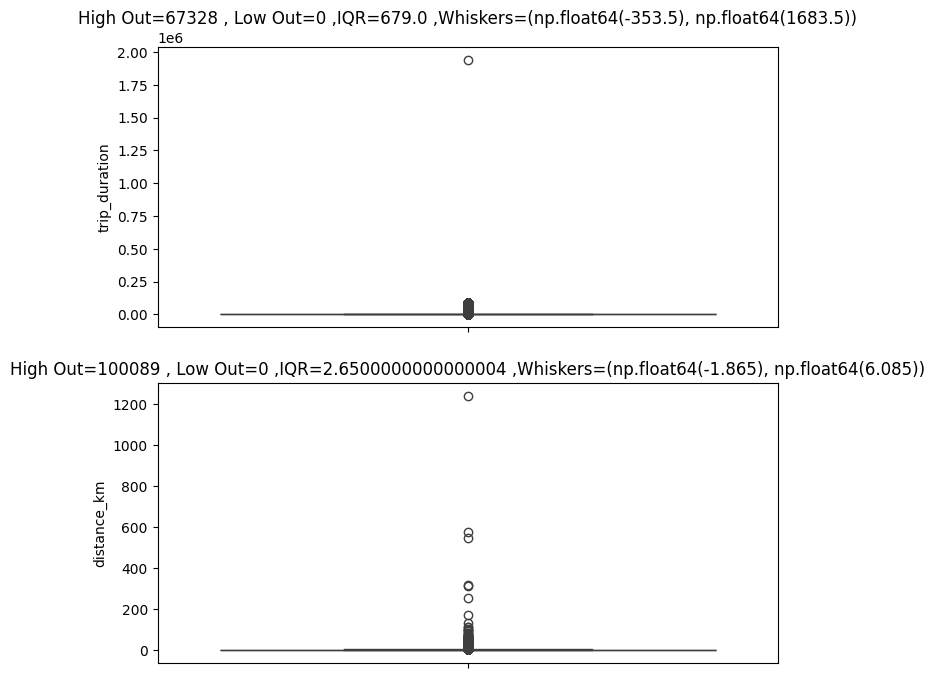

In [36]:
Outlier_View(df,var_group)

####  Outlier Treatment
- treating with whisker caps

In [37]:
def Outlier_Treatment(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr

    treated_series = series.copy()
    treated_series[treated_series < lower_whisker] = lower_whisker
    treated_series[treated_series > upper_whisker] = upper_whisker
    return treated_series

for i in var_group:
    df[i]=Outlier_Treatment(df[i])

<ipython-input-37-8c35a93ca736>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2096.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  treated_series[treated_series > upper_whisker] = upper_whisker


#### The data has been prepped now saving it

In [38]:
df.to_csv('treated_dataset.csv', index=False)

In [39]:
var_consider=essential_num+categ
var_consider

['trip_duration',
 'pickup_hour',
 'drop_hour',
 'distance_km',
 'vendor_id',
 'passenger_count',
 'store_and_fwd_flag',
 'pickup_day_week',
 'pickup_month',
 'Time_segment_incoming']

In [40]:
df2=pd.read_csv('treated_dataset.csv')
df2=df2[var_consider]
df2.head()

,trip_duration,pickup_hour,drop_hour,distance_km,vendor_id,passenger_count,store_and_fwd_flag,pickup_day_week,pickup_month,Time_segment_incoming
0,400.0,16,16,1.20,2,1,N,0,2,Mid-Day
1,1100.0,23,23,4.13,1,2,N,4,3,Off-Peak
2,1635.0,17,18,7.25,2,2,N,6,2,Evening Rush
3,1141.0,9,10,2.36,2,6,N,1,1,Morning Rush
4,848.0,6,6,4.33,1,1,N,2,2,Morning Rush


In [41]:
for i in categ:
    df2[i]=df2[i].astype('category')

In [42]:
df2.dtypes

,0
trip_duration,float64
pickup_hour,int64
drop_hour,int64
distance_km,float64
vendor_id,category
passenger_count,category
store_and_fwd_flag,category
pickup_day_week,category
pickup_month,category
Time_segment_incoming,category


In [43]:
df2=pd.get_dummies(df2)
df2.dtypes

,0
trip_duration,float64
pickup_hour,int64
drop_hour,int64
distance_km,float64
vendor_id_1,bool
vendor_id_2,bool
passenger_count_0,bool
passenger_count_1,bool
passenger_count_2,bool
passenger_count_3,bool


In [44]:
bool_var=df2.select_dtypes(include=['bool']).columns.tolist()
for i in bool_var:
    df2[i]=df2[i].apply(lambda x : 1 if x==True else 0)

In [45]:
df2=df2.drop(columns=['drop_hour'],axis=1)


In [46]:
df2=df2.dropna()

In [47]:
X=df2.drop('trip_duration',axis=1)
y=df2['trip_duration']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train.shape, X_test.shape

((435237, 30), (290158, 30))

In [49]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [50]:
from sklearn.metrics import r2_score
y_train_pred = lr_model.predict(X_train)

# Predict target values on the test set
y_pred = lr_model.predict(X_test)

In [51]:
r2_train_0= r2_score(y_train, y_train_pred)
print('Train r2 score: ', r2_train_0)

r2_test_0= r2_score(y_test, y_pred)
print('Test r2 score: ', r2_test_0)
table2=[]
table2.append(['Unregularized',r2_train_0,r2_test_0])

Train r2 score:  0.6631812822922647
Test r2 score:  0.659925693200272


#### Using L1 regularization

In [52]:
from sklearn.linear_model import Lasso, LassoCV
alphas = np.linspace(0, 10, 20)
alphas

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

In [53]:
lasso_cv = LassoCV(n_jobs=-1,alphas= alphas,
                   cv=10,
                   max_iter=10000)

In [54]:
lasso_cv.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18459113157.768066, tolerance: 10959013.170743534
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective di

LassoCV(alphas=array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ]),
        cv=10, max_iter=10000, n_jobs=-1)

In [55]:
best_alpha = lasso_cv.alpha_
best_alpha

np.float64(0.0)

In [56]:
coefficients_after_l1 = pd.DataFrame({
    'Feature': X_train.columns,
    'After Ll Regularization': lasso_cv.coef_
})
coefficients_after_l1

,Feature,After Ll Regularization
0,pickup_hour,3.990834e+00
1,distance_km,1.909820e+02
2,vendor_id_1,-1.442768e+00
3,vendor_id_2,-2.182782e-13
4,passenger_count_0,8.142693e+00
5,passenger_count_1,-1.876140e+01
6,passenger_count_2,2.635818e+00
7,passenger_count_3,1.240000e+01
8,passenger_count_4,1.487201e+01
9,passenger_count_5,-1.124744e+01


In [57]:
lasso_best = Lasso(alpha =  best_alpha)
lasso_best.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.052e+10, tolerance: 1.219e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

Lasso(alpha=np.float64(0.0))

In [58]:
non_zero_mask = lasso_best.coef_ != 0
non_zero_features = X_train.columns[non_zero_mask]

# Print the features with non-zero coefficients
non_zero_features.tolist()

['pickup_hour',
 'distance_km',
 'vendor_id_1',
 'vendor_id_2',
 'passenger_count_0',
 'passenger_count_1',
 'passenger_count_2',
 'passenger_count_3',
 'passenger_count_4',
 'passenger_count_5',
 'passenger_count_6',
 'store_and_fwd_flag_N',
 'store_and_fwd_flag_Y',
 'pickup_day_week_0',
 'pickup_day_week_1',
 'pickup_day_week_2',
 'pickup_day_week_3',
 'pickup_day_week_4',
 'pickup_day_week_5',
 'pickup_day_week_6',
 'pickup_month_1',
 'pickup_month_2',
 'pickup_month_3',
 'pickup_month_4',
 'pickup_month_5',
 'pickup_month_6',
 'Time_segment_incoming_Evening Rush',
 'Time_segment_incoming_Mid-Day',
 'Time_segment_incoming_Morning Rush',
 'Time_segment_incoming_Off-Peak']

In [59]:
X_train_1 = X_train[non_zero_features]
X_test_1 = X_test[non_zero_features]

In [60]:
lasso_best_1 = Lasso(alpha=best_alpha)
lasso_best_1.fit(X_train_1, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.052e+10, tolerance: 1.219e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

Lasso(alpha=np.float64(0.0))

In [61]:
lasso_best_1.predict(X_test_1)

array([734.69843411, 338.16859451, 291.07627374, ..., 600.39367577,
       913.61777539, 848.75063869])

In [62]:
r2_train_1 = lasso_best_1.score(X_train_1, y_train)
r2_test_1 = lasso_best_1.score(X_test_1, y_test)
table2.append(['Regularized L1',r2_train_1,r2_test_1])

#### L2 regularization

In [63]:
from sklearn.linear_model import RidgeCV, Ridge
alphas = np.linspace(0.1, 10, 20)
alphas

array([ 0.1       ,  0.62105263,  1.14210526,  1.66315789,  2.18421053,
        2.70526316,  3.22631579,  3.74736842,  4.26842105,  4.78947368,
        5.31052632,  5.83157895,  6.35263158,  6.87368421,  7.39473684,
        7.91578947,  8.43684211,  8.95789474,  9.47894737, 10.        ])

In [64]:
ridge_cv = RidgeCV(alphas=alphas, cv=10, scoring='r2')
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.62105263,  1.14210526,  1.66315789,  2.18421053,
        2.70526316,  3.22631579,  3.74736842,  4.26842105,  4.78947368,
        5.31052632,  5.83157895,  6.35263158,  6.87368421,  7.39473684,
        7.91578947,  8.43684211,  8.95789474,  9.47894737, 10.        ]),
        cv=10, scoring='r2')

In [65]:
best_alpha_ridge = ridge_cv.alpha_
best_alpha_ridge

np.float64(10.0)

In [66]:
alphas = np.linspace(10, 30, 20)
# Initialize RidgeCV to find the best alpha for L2 regularization
ridge_cv = RidgeCV(alphas=alphas, cv=10, scoring='r2')
ridge_cv.fit(X_train, y_train)
ridge_cv.alpha_

np.float64(30.0)

In [67]:
coefficients_after_l2 = pd.Series(ridge_cv.coef_, index=X_train.columns)
coefficients_after_l2

,0
pickup_hour,3.991318
distance_km,190.978258
vendor_id_1,-0.719827
vendor_id_2,0.719827
passenger_count_0,2.472020
passenger_count_1,-16.995564
passenger_count_2,4.395609
passenger_count_3,14.137675
passenger_count_4,16.572816
passenger_count_5,-9.471070


In [68]:
r2_train_2 = ridge_cv.score(X_train, y_train)
r2_test_2 = ridge_cv.score(X_test, y_test)
r2_train_2, r2_test_2

(0.6631812731970695, 0.65992571401992)

In [69]:
table2.append(['Regularized L2',r2_train_2,r2_test_2])

#### Elastic Net

In [70]:
from sklearn.linear_model import ElasticNetCV
alphas = np.linspace(0, 10, 20)
alphas

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

In [71]:
elastic_net_cv = ElasticNetCV(alphas=alphas, cv=10, max_iter=10000, l1_ratio=[.1, .5, .7, .9, .95, .99, 1])
elastic_net_cv.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18459113157.76799, tolerance: 10959013.170743534
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did

ElasticNetCV(alphas=array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
             max_iter=10000)

In [72]:
best_alpha_enet = elastic_net_cv.alpha_
best_l1_ratio = elastic_net_cv.l1_ratio_
print('Best alpha:', best_alpha_enet)
print('Best l1_ratio:', best_l1_ratio)

Best alpha: 0.0
Best l1_ratio: 0.7


In [73]:
r2_train_2 = elastic_net_cv.score(X_train, y_train)
r2_test_2 = elastic_net_cv.score(X_test, y_test)

r2_train_2, r2_test_2

(0.6631812822922648, 0.659925693200272)

In [74]:
table2.append(['Regularized Elastic Net',r2_train_2,r2_test_2])

In [75]:
df3 = pd.DataFrame(table2, columns=['Method','Train R2 Score','Test R2 Score'])
print(df3)

                    Method  Train R2 Score  Test R2 Score
0            Unregularized        0.663181       0.659926
1           Regularized L1        0.663181       0.659926
2           Regularized L2        0.663181       0.659926
3  Regularized Elastic Net        0.663181       0.659926


#### Conclusion:
- Test scores slighlty lower than train score,it generalises wella just a little better

#### Buisness Insights:
- Even if we plot a correlation involving pickup_longitude and such it will be just pure coincidence.
There will be outliers( when we plot , but they are useless) for longitude and latitude , that is because, it considers the points in flat shaped surface whereas the earth is spherical , therefore , I have come to the conclusion and also from experimentation in my first EDA attempt for this data set that , the longitude and latitude values do not play a role in correlation .
- Categorical:
vendor_id','passenger_count','store_and_fwd_flag','pickup_day_week','pickup_month','pickup_day','Time_segment_incoming','Time_segment_outgoing'

- Numerical Variables:
'trip_duration','pickup_hour','pickup_minutes','pickup_seconds','drop_hour','drop_minutes','drop_seconds,'distance_km'

- pickup_day== drop_day so we only take one variable
- **pickup_hour,drop_hour** : Are very similar differ by very small points , negligible kurtosis and skew.
- **trip_duration** : positively skewed and High positive kurtosis Indicating presence of outliers
- **distance_km** : positively skewed and High positive kurtosis Indicating presence of outliers

- These trips are short trips such that pick up and drop trips fall under the same category of hour.
- Even though there might be outliers with respect to distance, the pickup/drop hour are same. Perhaps it may indicate low traffic routes are followed by these cab drivers

- There are zero values  distance of  count 2901

- What can be attributed for these Zero Values of distance:
  -  Trip duration starts when it is booked online and  then cancelled(max chances)
  - GPS Glitches(minimal  occurence)
  - Poor networks
  - Software glitch  for round trips (where it tracks displacement rather than distance) - very minimal chance
  - Or no shows which caused the cab driver to end the trip
 - **We remove these zero values**
- There are cabs with zero passengers
  - they might be , if the rider wants to be picked from a - - specific spot(plausible chances of occurence)
  - Car used for personal use the by the cab driver(plausible chances of occurence) (pl
  - glitches in software(minimum chance of occurig)
- pickup and drop hour are nearly similar
- **distance_km vs trip_duration**: majority of the trips are below the 25 km mark  with an exception of one point( definitely an outlier) and majority of the trips definitely take  much less than 5.5hr apart from  very few which may be either due to traffic jams  or driver error in ending the trips and software error in uploading the data or software glitches( This is because trips less  than 5 km have breached 22 hr mark in trip duration.  It may most probably due to **store_fwd_flag issue ; with category 'y' ie. data being sent to server on a later time period**.
- **distance vs pickup and drop hour** : Are more less similar , the cabs are consitent in obtaining frequent trips withthin the 10-15 km radius. They are also able to obtain trips beyond the 15km radius mark
- **pickup and drop_hour** : they are mirror images of each other other: It implies the trips are very short,perhaps  trips are taken through less congested areas and the driver has no difficulty in obtaining the next trip
- **10-15** km of the place is a suitable radius to obtain short trips.
- **Statistical Analysis :**
  - Continuous-Categorical
    - The relationship between trip_duration and passenger_count over 0 is statistically  not significant
    - The relationship between distance_km and passenger_count over 0 is statistically  not significant
    - The relationship between distance_km and pickup_month over 3 is statistically  not significant
  - Categorical Categorical
    - All are significant in nature
- Outliers:
  - Outliers can be observed in  as we had seen from kurtosis:
    - trip_duration
    - distance_km
  -Outliers treated with whisker caps
- Regularization:
  -  The test scores are miniscully lower than  train scores indicating a  miniscule generalistion
  - There is  No difference even if the model has been regularized


